### Data Exploration 01

In [1]:
dataset_path = "/workspaces/SupervisedML/data/raw_dataset/IEA Global EV Data 2024.csv"

In [3]:
!pip install pandas


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [7]:
import pandas as pd
# Load dataset as Pandas dataframe
df = pd.read_csv(dataset_path)
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


In [10]:
df.describe()

,year,value
count,12654.000000,1.265400e+04
mean,2019.822112,4.273742e+05
std,5.476494,6.860498e+06
min,2010.000000,1.200000e-06
25%,2016.000000,2.000000e+00
50%,2020.000000,1.300000e+02
75%,2022.000000,5.500000e+03
max,2035.000000,4.400000e+08


In [9]:
if df.isnull().values.any():
  print("there are missing values")
else:
  print("there are no missing values")
missing_values=df.isnull().sum()
print(missing_values)


there are no missing values
region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64


In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns


In [15]:
numerical_cols = df.select_dtypes(include=['number']).columns 


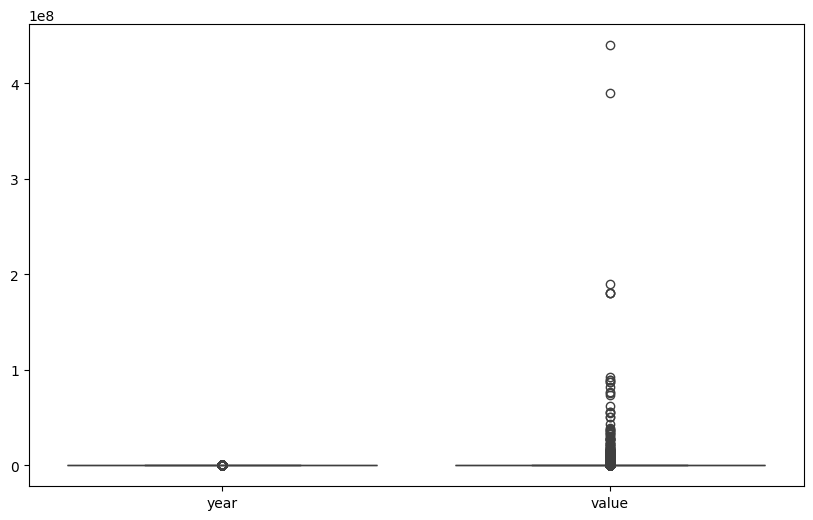

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols])
plt.show()


In [17]:
#Detect and remove outliers using the IQR method:
#https://www.geeksforgeeks.org/interquartile-range-to-detect-outliers-in-data/ 
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1


In [18]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers
df = df[~((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)]

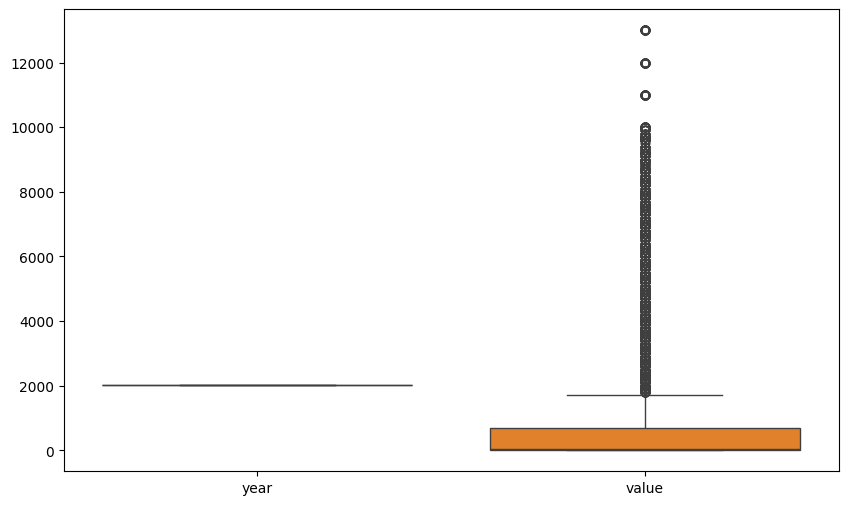

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols])
plt.show()


In [ ]:
#END of data Cleaning

In [25]:
pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [26]:
from sklearn.preprocessing import LabelEncoder

In [32]:
# Label encoding for categorical variables
encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = encoder.fit_transform(df[col])
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,0,0,4,1,1,2011,5,0.00039
1,0,0,2,1,1,2011,5,0.00650
2,0,0,1,1,0,2011,3,49.00000
3,0,0,3,1,0,2011,3,49.00000
4,0,0,3,1,0,2012,3,220.00000


In [ ]:
#Data Handling DONE

In [ ]:
#SAVE preprocessed data

In [34]:
df.to_csv('/workspaces/SupervisedML/data/preprocessed_data/Handled_data.csv')